In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.csv',header=None,names=names,sep=';')

In [3]:
df.head()
#df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# We change the M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
from sklearn.preprocessing import Normalizer
from sklearn import metrics

In [7]:
#!pip install mglearn

In [8]:
import mglearn

In [9]:
#mglearn.plots.plot_dbscan()

# Take Abalone dataset. Run some clustering method (except k-means) with different number of clusters.Which number of clusters is better?

In [10]:
# abalone dataset
X = df.drop(['Rings','Sex'],axis=1)
label_rings=df.Rings
scaler = Normalizer()
scaler.fit(X)
X_scaled = scaler.transform(X)

# AgglomerativeClustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
label_pred= agg.fit_predict(X_scaled)

Text(0,0.5,'Feature 1')

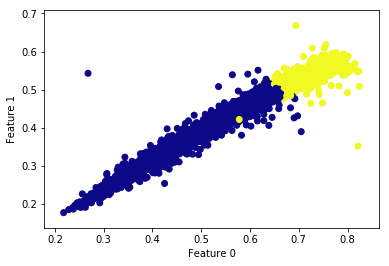

In [12]:
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [13]:
print("ARI =", metrics.adjusted_rand_score(label_rings, label_pred).round(3))

ARI = 0.032


In [14]:
agg = AgglomerativeClustering(n_clusters=5)
label_pred= agg.fit_predict(X_scaled)

In [15]:
label_pred

array([2, 0, 1, ..., 3, 3, 4], dtype=int64)

Text(0,0.5,'Feature 1')

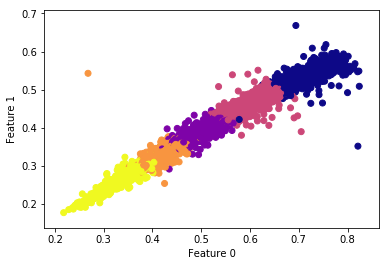

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [17]:
print("ARI =", metrics.adjusted_rand_score(label_rings, label_pred).round(2))

ARI = 0.06


In [18]:
agg = AgglomerativeClustering(n_clusters=8)
label_pred= agg.fit_predict(X_scaled)
print("ARI =", metrics.adjusted_rand_score(label_rings, label_pred).round(3))

ARI = 0.052


Text(0,0.5,'Feature 1')

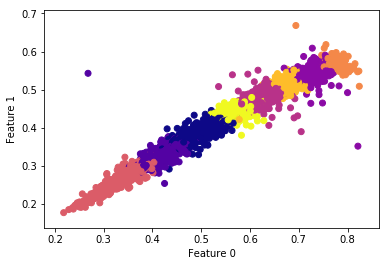

In [19]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### comment: When the cluster no 5 , it gives highest score. Therefore we can say that 5 no of cluster is better.

### 2.Take Abalone dataset. Reduce it’s dimensionality to 3 with Kernel PCA, then run clustering with 10 clusters.


In [20]:
from sklearn.decomposition import KernelPCA
# keep the first three principal components of the data
pca = KernelPCA(n_components=3, kernel='cosine',fit_inverse_transform=True)
# fit PCA model to abalone dataset
pca.fit(X_scaled)
# transform data onto the first three principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (4177, 7)
Reduced shape: (4177, 3)


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10).fit(X_pca)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_pca)
closest

array([1346, 1986, 2468, 2162, 4162, 1014, 3064, 3023, 1668,  233],
      dtype=int64)

#### the closest gave output as array for the ten clusters. So X[3064] is the closest point in X to centroid 0, and X[1545] is the closest to centroid 1 and so on.

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

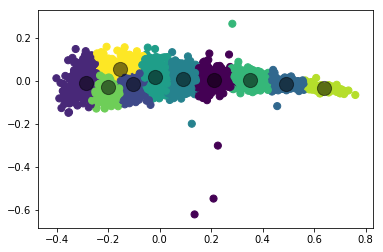

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [24]:
centers.shape

(10, 3)

# 3. Label propagation:

In [25]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

# cluster Abalone dataset without age (rings) feature using Gaussian Mixture Model

In [26]:
#abalone Dataset without ring
X_df = df.drop(['Rings'],axis=1)


In [27]:
#X_df.head()

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_df)
X_scaled = scaler.transform(X_df)

In [29]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=12)
gmm.fit(X_scaled)
labels=gmm.predict(X_scaled)


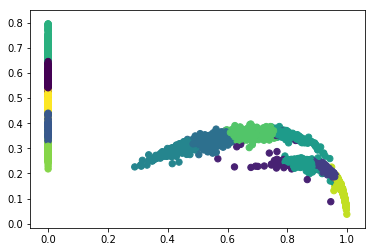

In [30]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=40, cmap='viridis')

In [31]:
#print(proba_lists[:5].round(3))

#### take randomly 20 samples with age from the original Abalone dataset, predict their probabilities with GaussianMM ("predict_proba")

In [32]:
X_small=df.sample(20)
rings= df['Rings'].sample(20)
del X_small['Rings']
X_small.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3955,2,0.490,0.385,0.120,0.5910,0.2710,0.1125,0.1775
46,0,0.470,0.370,0.120,0.5795,0.2930,0.2270,0.1400
1304,0,0.535,0.435,0.150,0.7170,0.3475,0.1445,0.1940
32,0,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.3500
1989,2,0.280,0.210,0.075,0.1195,0.0530,0.0265,0.0300


In [33]:
scaler = Normalizer()
scaler.fit(X_small)
X1_scaled = scaler.transform(X_small)

In [34]:
gmm = GaussianMixture(n_components=12)
gmm.fit(X1_scaled)
labels=gmm.predict(X1_scaled)
cluster = gmm.predict_proba(X1_scaled)


In [35]:
print(cluster[:5].round(3))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


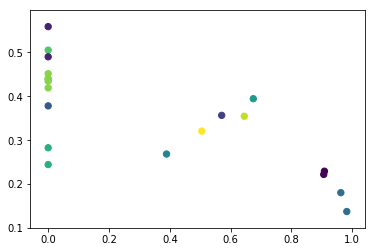

In [36]:
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels, s=40, cmap='viridis')

In [37]:
#Transform 'Rings' to multiple class
rings=pd.get_dummies(rings)
ring_values= np.array(rings.columns)

In [38]:
#rings.head()

In [39]:
#ring_values

In [40]:
#Get cluster x class matrix
cluster_age = cluster.T @ rings
# normalize so probabilities sum up to 1
cluster_age = cluster_age / cluster_age.sum(1)[:,None]
#cluster_age

In [41]:
#Get samples x class matrix
predicted_classes= gmm.predict_proba(X_df) @ cluster_age
#predicted_classes[:3]

In [42]:
#Predict rings by multiplying 'Rings' values of classes with class probabilities

predicted_age= predicted_classes @ ring_values

In [43]:
predicted_age.shape

(4177,)

In [44]:
predicted_age.round(3)

array([ 7. ,  7. , 13.5, ...,  9.6, 13.5, 13.5])